# Import Libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [173]:
df = pd.read_csv("adult.data")
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# EDA & Data Preprocessing
make the income column value binary

In [174]:
df["income"] = df["income"].apply(lambda x: 1 if x == " >50K" else 0)
df.income.value_counts()

,count
income,
0,24720
1,7841


The workclass data is also skewed, more than half of them is private. So we may make the workclass column value binary, 0 if private and everything else will be 0

In [175]:
df["workclass"].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [176]:
df["workclass"] = df["workclass"].apply(lambda x: 1 if x == " Private" else 0)
df.workclass.value_counts()

,count
workclass,
1,22696
0,9865


The native country data is also skewed, more than half of them is United-States. So we may make the workclass column value binary, 0 if private and everything else will be 0

In [177]:
df["native-country"].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [178]:
df["native-country"] = df["native-country"].apply(lambda x: 1 if x == " United-States" else 0)
df["native-country"].value_counts()

,count
native-country,
1,29170
0,3391


The occupation data is distributed fairly

In [179]:
df["occupation"].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


visualize numerical data

In [180]:
df_num = df.select_dtypes(include="number")
df_num.head()

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,13,2174,0,40,1,0
1,50,0,83311,13,0,0,13,1,0
2,38,1,215646,9,0,0,40,1,0
3,53,1,234721,7,0,0,40,1,0
4,28,1,338409,13,0,0,40,0,0


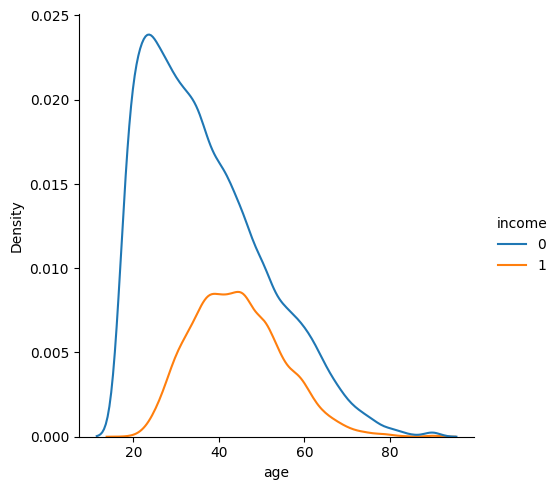

In [181]:
sns.displot(data=df, x="age", hue="income", kind="kde")

final weight column have many outlier

<Axes: >

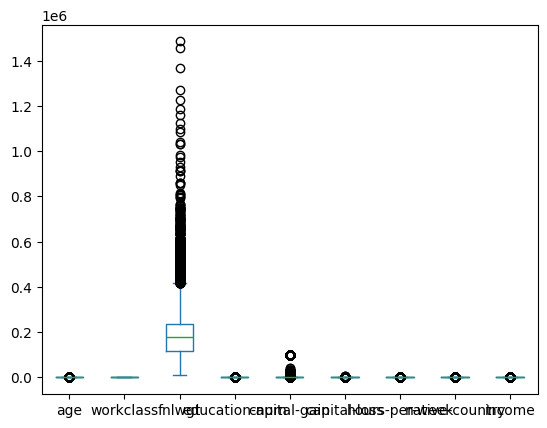

In [182]:
df_num.plot.box()

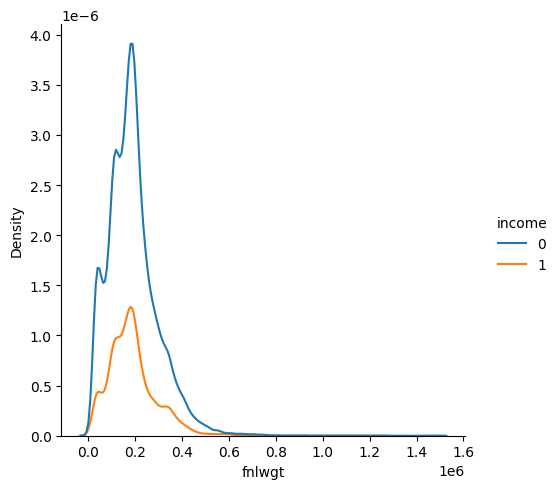

In [183]:
sns.displot(data=df, x="fnlwgt", hue="income", kind="kde")

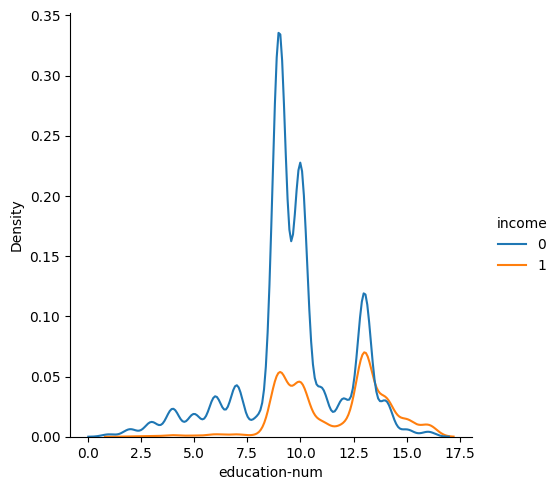

In [184]:
sns.displot(data=df_num, x="education-num", hue="income", kind="kde")

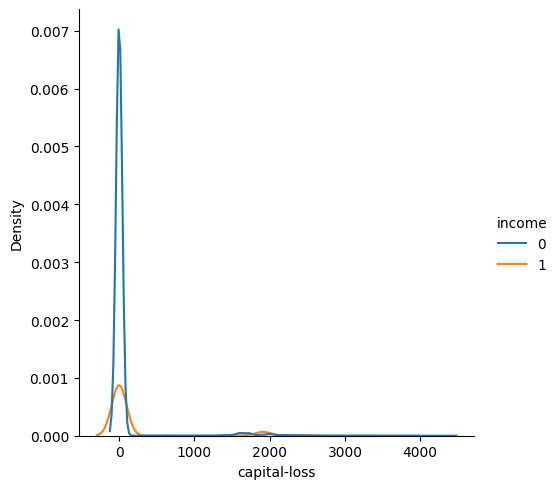

In [185]:
sns.displot(data=df_num, x="capital-loss", hue="income", kind="kde")

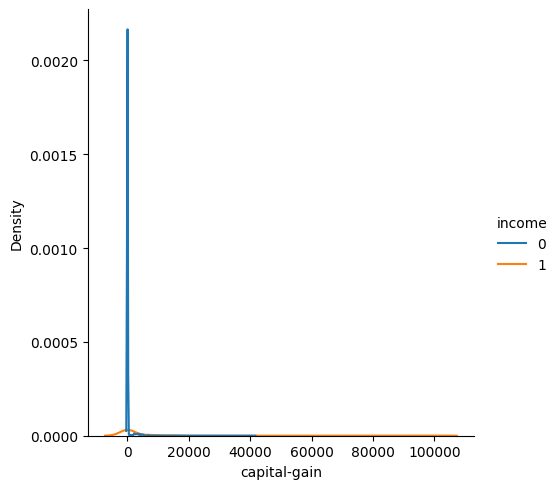

In [186]:
sns.displot(data=df_num, x="capital-gain", hue="income", kind="kde")

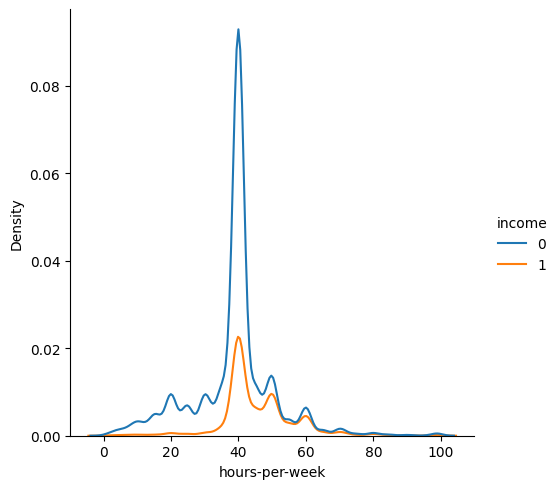

In [187]:
sns.displot(data=df_num, x="hours-per-week", hue="income", kind="kde")

categorical data exploring

In [188]:
df_categorical = df.select_dtypes(include="object")
df_categorical.head()

,education,marital-status,occupation,relationship,race,sex
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


make categorical data numeric

In [189]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,0,2671,9,12,4,1,1,4,1,25,0,39,1,0
1,33,0,2926,9,12,2,4,0,4,1,0,0,12,1,0
2,21,1,14086,11,8,0,6,1,4,1,0,0,39,1,0
3,36,1,15336,1,6,2,6,0,2,1,0,0,39,1,0
4,11,1,19355,9,12,2,10,5,2,0,0,0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,1,16528,7,11,2,13,5,4,0,0,0,37,1,0
32557,23,1,8080,11,8,2,7,0,4,1,0,0,39,1,1
32558,41,1,7883,11,8,6,1,4,4,0,0,0,39,1,0
32559,5,1,12881,11,8,4,1,3,4,1,0,0,19,1,0


split the data to fit the model better

In [190]:
bernoulli = ["workclass","sex","native-country"]
gaussian = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
categorical = ["education","marital-status","occupation","relationship","race"]

naive bayes modeling

In [209]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

df_gaussian = df[gaussian]
df_bernoulli = df[bernoulli]
df_categorical = df[categorical]

model_gaussian = GaussianNB()
model_gaussian.fit(df_gaussian, df["income"])

model_multi = MultinomialNB()
model_multi.fit(df_bernoulli, df["income"])

model_categorical = CategoricalNB()
model_categorical.fit(df_categorical, df["income"])

print("gaussian: ", model_gaussian.score(df_gaussian, df["income"]))
print("multi: ", model_multi.score(df_bernoulli, df["income"]))
print("categorical: ", model_categorical.score(df_categorical, df["income"]))

gaussian:  0.793863824821105
multi:  0.7591904425539756
categorical:  0.7950308651454193


join the model

In [211]:
join_model = model_categorical.predict_proba(df_categorical) \
            + model_gaussian.predict_proba(df_gaussian) \
            + model_multi.predict_proba(df_bernoulli)
join_model = join_model / 3

from sklearn.metrics import roc_auc_score
roc_auc_score(df["income"], join_model[:, 1])

0.8861340444943577

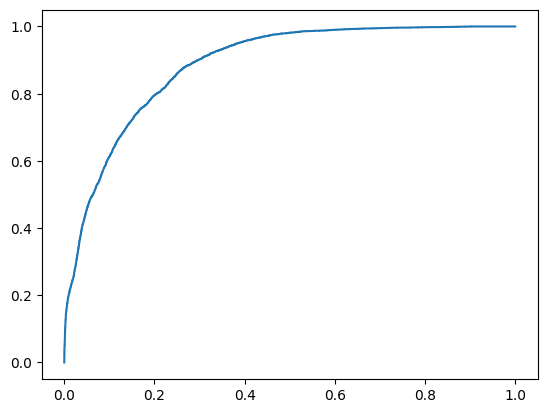

In [212]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df_num["income"], join_model[:, 1])
plt.plot(fpr, tpr)
plt.show()

# Another preprocessing approach

In [295]:
! pip install category-encoders

In [348]:
df = pd.read_csv("adult.data")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


view categorical data

In [349]:
categorical=['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df[categorical]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


replace '?' categorical data with null

In [350]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native-country'].replace(' ?', np.NaN, inplace=True)

In [351]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [352]:
numerical=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [353]:
x=df.drop('income',axis=1)
y=df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 26)
x_train.shape, x_test.shape

((22792, 14), (9769, 14))

In [354]:
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native-country'].fillna(x_train['native-country'].mode()[0], inplace=True)

In [355]:
# x_train[categorical].isnull().sum()
# x_test[categorical].isnull().sum()
x_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
27371,Private,Prof-school,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
18868,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
26732,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
29142,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
12771,Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,Male,United-States


In [356]:
import category_encoders as ce

In [357]:
print(x_train.columns)
print(x_test.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [358]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [359]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
27371,47,1,0,0,0,0,0,0,0,423222,...,0,0,0,0,0,0,0,0,0,0
18868,32,1,0,0,0,0,0,0,0,209103,...,0,0,0,0,0,0,0,0,0,0
26732,51,1,0,0,0,0,0,0,0,96609,...,0,0,0,0,0,0,0,0,0,0
29142,33,1,0,0,0,0,0,0,0,90668,...,0,0,0,0,0,0,0,0,0,0
12771,38,1,0,0,0,0,0,0,0,126675,...,0,0,0,0,0,0,0,0,0,0


feature scaling

In [360]:
from sklearn.preprocessing import RobustScaler

col=x_train.columns

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns=[col])
x_test = pd.DataFrame(x_test, columns=[col])
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.059746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.687140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.737105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.434278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [371]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

GaussianNB()

In [380]:
y_pred = gnb.predict_proba(x_test)[:, 1]
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8956
